# Reflection ptychography
 - This tutorial shows a reconstruction with a reflection dataset measusred with a two-layer sample at 708 nm, which is used in the publication:"Mengqi Du, Lars Loetgering, Kjeld S.E. Eikema, and Stefan Witte. "Ptychographic optical coherence tomography." Optics Letters 46, no. 6 (2021): 1337-1340." 
 - Check out general tutorials for CPM (conventional ptychographic microscopy) before diving into this one.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [2]:
# import the PtyLab module
import PtyLab
from PtyLab import ExperimentalData
from PtyLab import Reconstruction
from PtyLab import Monitor
from PtyLab import Params
from PtyLab import Engines

Step 1: Download the preprocessed data from surfdrive(I guess it's better to have a link for all the hdf5 files?) 

In [3]:
# set your data folder as fileFolder 
fileFolder = Path(r"D:\...\...")
# select the hdf5 file
fileName = "TwoLayer_bin4.hdf5"
# create the complete filePath
filePath = Path.joinpath(fileFolder,fileName)

Step 2: Initialize the ExperimentalData class 

In [4]:
# Initialize the ExperimentalData using the filePath, and choose the operation Mode (default is 'CPM')
experimentalData = ExperimentalData(filePath, operationMode='CPM')
# show measured ptychogram in log scale. Need to close the window to continue
experimentalData.showPtychogram()

Maximum count in ptychogram is 12029


Step 3: Initialize the Reconstruction class and set properties

In [5]:
# Initialize the Reconstruction class
reconstruction = Reconstruction(experimentalData)
# reconstruction.No = 2**11

# choose the inital format of the probe and object, and initialize them
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
reconstruction.initializeObjectProbe()

# Optional: customize initial probe quadratic phase: 
# since we know our beam is divergent, we add a diverging wavefront to the initial beam
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

Step 4: Initialize the Monitor class and set properties

In [6]:
# Initialize the Monitor class
monitor = Monitor()
# Set monitor properties
monitor.figureUpdateFrequency = 1 
monitor.objectPlot = 'complex'  # complex abs angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 0.8  # control object plot contrast, 0-1, higher constrast with smaller number
monitor.probeContrast = 0.5  # control probe plot contrast, 0-1, higher constrast with smaller number

Step 5: Initialize the Params class and set properties

In [7]:
# Initialize the Params class
params = Params()
# Set params properties
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagator = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True
params.comStabilizationSwitch = True
params.fftshiftSwitch = False
params.backgroundModeSwitch = True
params.intensityConstraint = 'standard'  

Step 6: Choose the engine, set the properties, and do reconstruction

d:\du\workshop\PtyLab\PtyLab\Engines\BaseEngine.py:293: UserWarning: fftshiftSwitch set to false, this may lead to reduced performance
  warnings.warn('fftshiftSwitch set to false, this may lead to reduced performance')


<IPython.core.display.Javascript object>


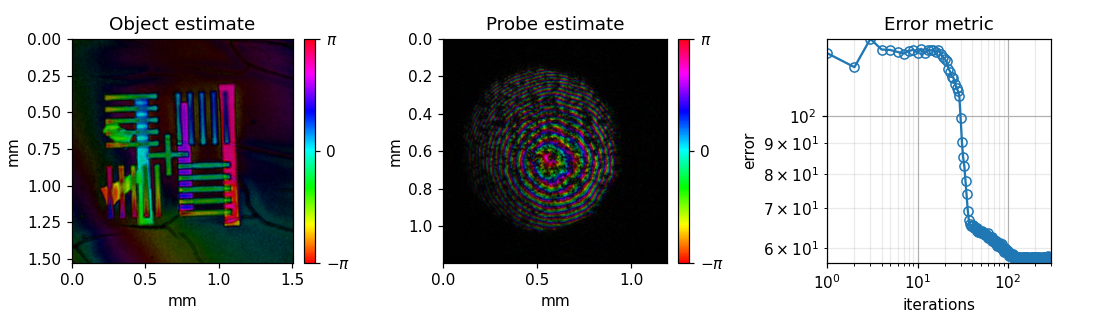

<IPython.core.display.Javascript object>


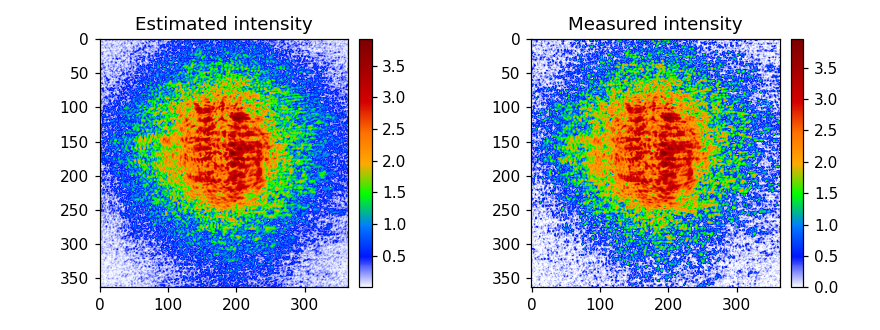

                                                                                                                       
iteration: 0                                                                                                           
error: 127.6                                                                                                           
estimated linear overlap: 88.5 %                                                                                       
estimated area overlap: 84.0 %                                                                                         
                                                                                                                       
iteration: 1                                                                                                           
error: 120.9                                                                                                           
estimated linear overlap: 90.3 %        

iteration: 27                                                                                                          
error: 110.2                                                                                                           
estimated linear overlap: 88.7 %                                                                                       
estimated area overlap: 83.0 %                                                                                         
                                                                                                                       
iteration: 28                                                                                                          
error: 108.1                                                                                                           
estimated linear overlap: 87.7 %                                                                                       
estimated area overlap: 83.2 %          

error: 63.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
                                                                                                                       
iteration: 55                                                                                                          
error: 63.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
                                        

estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
                                                                                                                       
iteration: 82                                                                                                          
error: 60.3                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
                                                                                                                       
iteration: 83                           

estimated area overlap: 79.6 %                                                                                         
                                                                                                                       
iteration: 109                                                                                                         
error: 58.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
                                                                                                                       
iteration: 110                                                                                                         
error: 58.2                             

                                                                                                                       
iteration: 136                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
                                                                                                                       
iteration: 137                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.2 %        

iteration: 163                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
                                                                                                                       
iteration: 164                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %          

error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
                                                                                                                       
iteration: 191                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
                                        

estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
                                                                                                                       
iteration: 218                                                                                                         
error: 56.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.3 %                                                                                         
                                                                                                                       
iteration: 219                          

estimated area overlap: 79.7 %                                                                                         
                                                                                                                       
iteration: 245                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
                                                                                                                       
iteration: 246                                                                                                         
error: 57.3                             

                                                                                                                       
iteration: 272                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
                                                                                                                       
iteration: 273                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %        

iteration: 299                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [03:18<00:00,  1.51it/s]


In [8]:
# Choose mPIE engine
mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 300
mPIE.betaProbe = 0.25
mPIE.betaObject = 0.25
mPIE.reconstruct()

In [9]:
## now save the data
# reconstruction.saveResults(fileName+'_reconstruction.hdf5')